In [40]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [41]:
df = pd.read_csv('../Datasets/car_price_prediction.csv')

In [42]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [43]:
df = df.drop(columns=['ID'])

In [44]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [46]:
df.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


Formatting Columns

In [47]:
df['Mileage'] = df['Mileage'].str.split(' ').str.get(0).astype('int')
df['Engine volume'] = df['Engine volume'].str.split(' ').str.get(0).astype('float')


In [58]:
df['Levy'].value_counts()

Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

In [48]:
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

Visualizing Outliers

/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_12975/3339402972.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), fontsize=12)
/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_12975/3339402972.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_yticklabels(axes[0, 1].get_yticklabels(), fontsize=12)
/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_12975/3339402972.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_yticklabels(axes[0, 2].get_yticklabels(), fontsize=12)
/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_12975/3339402972.py:21: UserWarning: set_ticklabels() should only be used with a fixed number

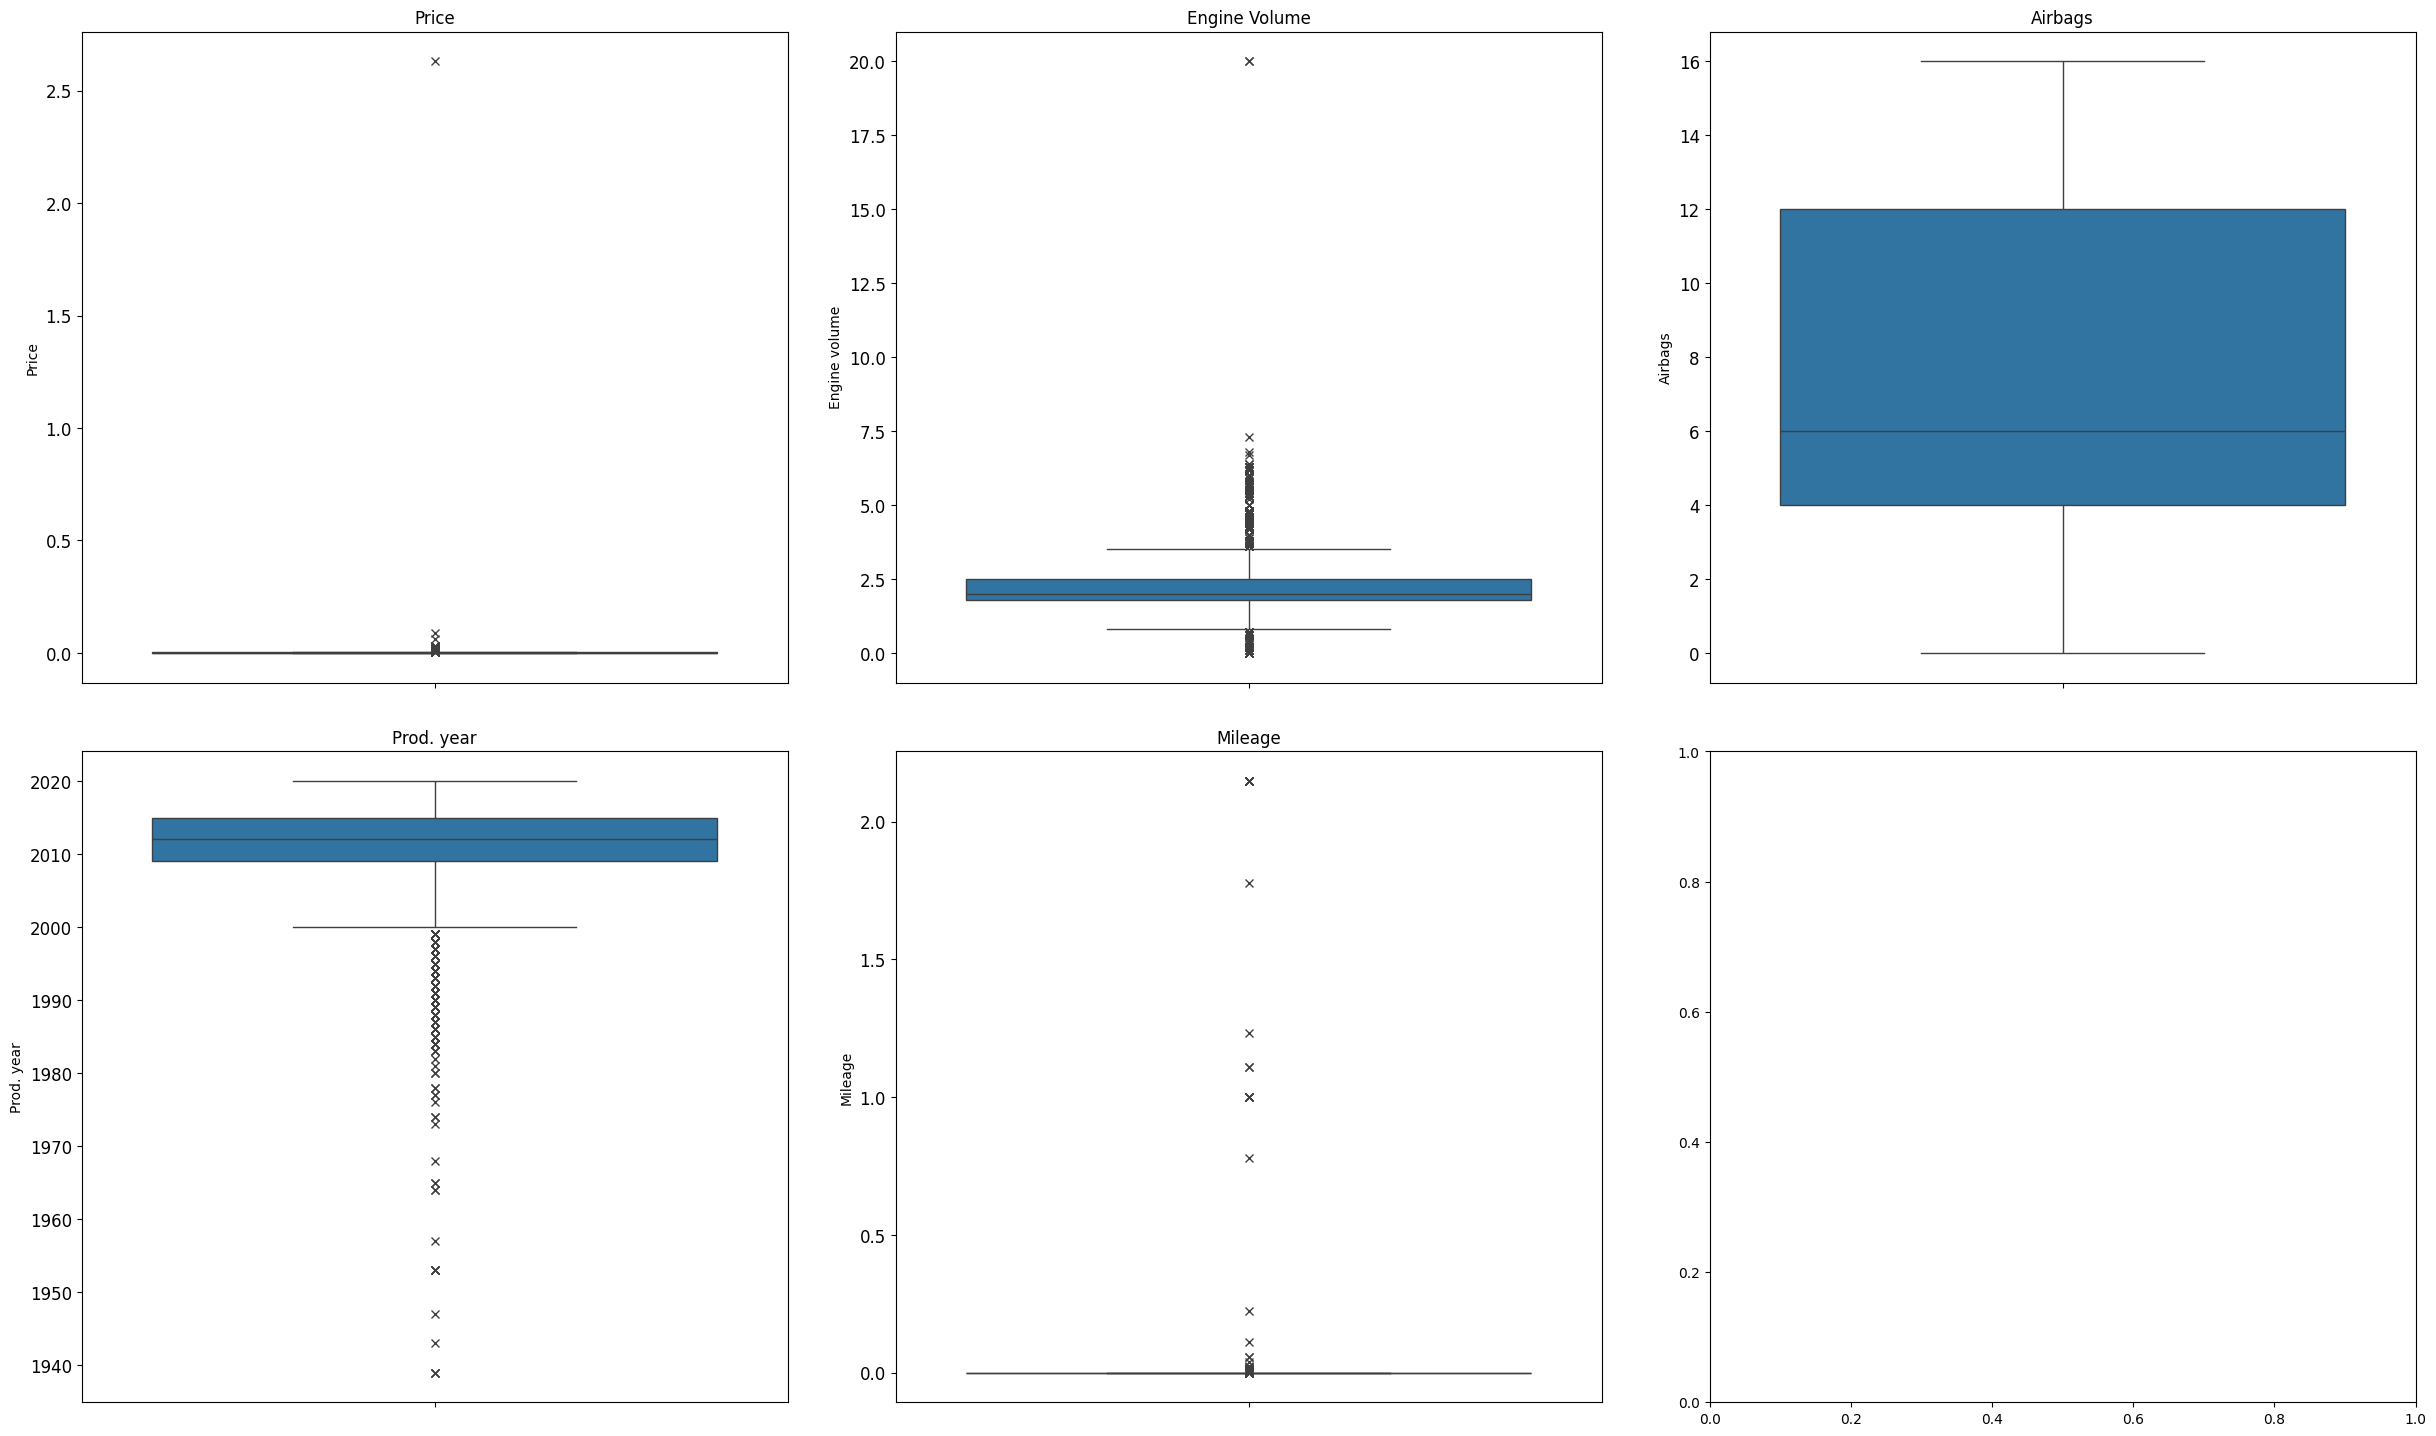

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

# Boxplot for 'Price'
sns.boxplot(df['Price'], flierprops={"marker": "x"}, ax=axes[0, 0])
axes[0, 0].set_title('Price')
axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), fontsize=12)

# Boxplot for 'Engine volume'
sns.boxplot(df['Engine volume'], flierprops={"marker": "x"}, ax=axes[0, 1])
axes[0, 1].set_title('Engine Volume')
axes[0, 1].set_yticklabels(axes[0, 1].get_yticklabels(), fontsize=12)

# Boxplot for 'Airbags'
sns.boxplot(df['Airbags'], flierprops={"marker": "x"}, ax=axes[0, 2])
axes[0, 2].set_title('Airbags')
axes[0, 2].set_yticklabels(axes[0, 2].get_yticklabels(), fontsize=12) 

# Boxplot for 'Prod. year'
sns.boxplot(df['Prod. year'], flierprops={"marker": "x"}, ax=axes[1, 0])
axes[1, 0].set_title('Prod. year')
axes[1, 0].set_yticklabels(axes[1, 0].get_yticklabels(), fontsize=12)

# Boxplot for 'Levy'
sns.boxplot(df['Mileage'], flierprops={"marker": "x"}, ax=axes[1, 1])
axes[1, 1].set_title('Mileage')
axes[1, 1].set_yticklabels(axes[1, 1].get_yticklabels(), fontsize=12)

plt.tight_layout(pad=3)

plt.show()